**ESTUDIO DE LOS FRACTALES: El conjunto de Mandelbrot**

*Introducción: ¿Qué es un fractal?*

- Los fractales son estructuras matemáticas que se repiten indefinidamente en diferentes escalas. 
- Aunque el concepto puede sonar extraño o complejo, en realidad es un fenómeno muy comun en la naturaleza (por ejemplo, la forma de la hoja de un helecho se repite en cada una de sus hojas más pequeñas, y así indefinidamente). 
- El término "fractal" fue acuñado por el matemático Benoît Mandelbrot, inventor del fractal que implementaremos en Python: **El conjunto de Mandelbrot**

*Condiciones iniciales*

- El conjunto de Mandelbrot contiene la serie de números complejos que van surgiendo al aplicar una y otra vez (**iterar**) la ecuación siguiente:
$$
Z(n+1) = Z_n^2 + C
$$
- Se deben cumplir dos condiciones adicionales:
1. $Z_0$ = 0
2. El número complejo C, que da pie a la iteración no genere una serie de números cada vez mayores, cuyo límite tienda a infinito.

- En otras palabras, para determinar si un número complejo "C" pertenece al conjunto debe verificar las condiciones anteriores. A partir de ese momento, C permanecerá constante al iterar la secuencia.

In [ ]:
"""EJEMPLO_1:"""

def z(n,c):
    if n == 0:
        return 0
    else:
        return z(n-1,c)**2 + c

for n in range(10):
    print(f"z({n}) = {z(n, c=1)}") #Llamamos a la función con un c = 1

"""La función z(n,c) devuelve el n-ésimo elemento de la secuencia. 'n' sería el índice del número que queremos calcular y 'c' es un número fijo que estamos probando."""

z(0) = 0
z(1) = 1
z(2) = 2
z(3) = 5
z(4) = 26
z(5) = 677
z(6) = 458330
z(7) = 210066388901
z(8) = 44127887745906175987802
z(9) = 1947270476915296449559703445493848930452791205


Para c = 1, se puede observar la rápida tasa de crecimiento de los elementos. En menos de diez interacciones, nuestro número complejo se dispará hacia el infinito. Esto nos indica que c = 1 **no pertenece al conjunto de Mandelbrot**

*Representación gráfica del conjunto de Mandelbrot (con Matplotlib)*

C:\Users\nalda\AppData\Local\Temp\ipykernel_9512\3853420543.py:12: RuntimeWarning: overflow encountered in square
  z = z**2 + c #esta operación se realiza para todos los elementos de la matriz "c" en cada iteración
C:\Users\nalda\AppData\Local\Temp\ipykernel_9512\3853420543.py:12: RuntimeWarning: invalid value encountered in square
  z = z**2 + c #esta operación se realiza para todos los elementos de la matriz "c" en cada iteración


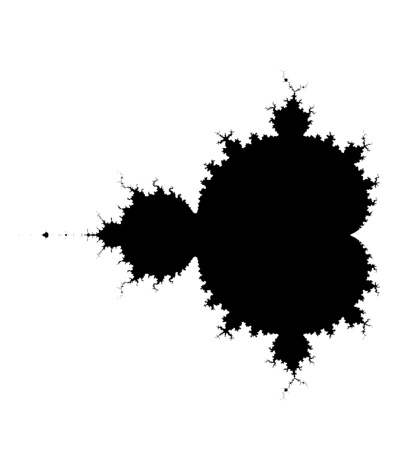

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def complex_matrix(x_min, x_max, y_min, y_max, pixel_density):
    re = np.linspace(x_min, x_max, int((x_max - x_min)*pixel_density)) #obtenemos puntos en el eje horizontal entre un x_max y x_min
    im = np.linspace(y_min, y_max, int((y_max - y_min)*pixel_density)) #obtenemos puntos en el eje vertical entre un y_max y un y_min
    return re[np.newaxis, :] + im[:, np.newaxis] * 1j #creamos una matriz bidimensional de números complejos encerrada en una área rectangular definida por los cuatros parámetos anteriores

def is_stable(c, num_iteraciones):
    z = 0
    for i in range(num_iteraciones):
        z = z**2 + c #esta operación se realiza para todos los elementos de la matriz "c" en cada iteración
    return (abs(z) <= 2) #devuelve valores booleanos 'True' o 'False'

def obtener_elementos(c, num_iteraciones):
    mask = is_stable(c, num_iteraciones)
    return c[mask]

c = complex_matrix(-2, 0.5, -1.5, 1.5, pixel_density=512)
elementos = obtener_elementos(c, num_iteraciones=20)

#plt.scatter(elementos.real, elementos.imag, color="black", marker=",", s=1)
plt.imshow(is_stable(c, num_iteraciones=20), cmap="binary")
plt.gca().set_aspect("equal") #obtiene el eje actual con una misma escala para los ejes X e Y
plt.axis("off") #desactivo los ejes de la figura
plt.tight_layout() #ajusta automáticamente el diseño para que nada quede cortado o superpuesto
plt.show()

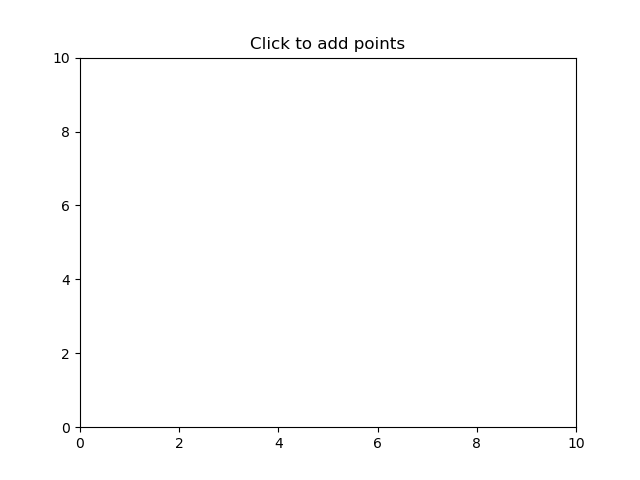

In [ ]:
%matplotlib widget

import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()
ax.set_title("Click to add points")
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# Store clicked points
points_x = [] #coord x vacías (a añadir por el usuario)
points_y = [] #coord y vacías (a añadir por el usuario)
sc = ax.scatter(points_x, points_y, color='red')

"""Manejador de eventos (Handler): la función def onclick pinta un punto, dicho evento lo maneja el handler"""

def onclick(event):
    if event.inaxes == ax:
        points_x.append(event.xdata)
        points_y.append(event.ydata)
        sc.set_offsets(list(zip(points_x, points_y)))
        fig.canvas.draw_idle()

# Connect the click event to the handler
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

**Event**
Matplotlib genera un objeto event cuando ocurre una acción del usuario (como un clic). Este objeto contiene información como:
- **event.xdata**: coordenada X en el eje donde se hizo clic
- **event.ydata**: coordenada Y en el eje donde se hizo clic
- **event.inaxes**: indica si el clic ocurrió dentro de un subplot específico

```python
if event.inaxes == ax:
```
- Evita registrar clics fuera del gráfico

```python
points_x.append(event.xdata)
points_y.append(event.ydata)
```
- Guarda las coordenadas del clic en listas que almacenan los puntos.

```python
sc.set_offsets(list(zip(points_x, points_y)))
```
- zip(points_x, points_y) genera pares (x,y) -> creo coordenadas
- set_offsets() actualiza los puntos mostrados. Así, cada vez que haces clic, aparece un nuevo punto en el gráfico.

```python
fig.canvas.draw_idle()
```
- Redibuja la figura para mostrar los cambios sin bloquear la ejecución (a diferencia de un draw() normal).

Nuevos límites: xlim=(np.float64(-0.5), np.float64(10.5)), ylim=(np.float64(-1.0993384025373631), np.float64(1.0996461858110391))


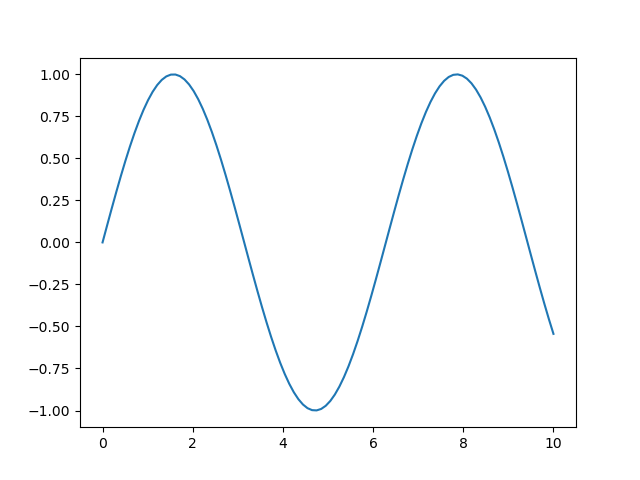

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)

def on_draw(event):
    # Leer los nuevos límites de los ejes después de un zoom o pan
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    print(f"Nuevos límites: xlim={xlim}, ylim={ylim}")

# Conectar el evento draw_event
fig.canvas.mpl_connect('draw_event', on_draw)

plt.show()


C:\Users\nalda\AppData\Local\Temp\ipykernel_47784\2104354837.py:23: RuntimeWarning: overflow encountered in multiply
  z = z*z + c
C:\Users\nalda\AppData\Local\Temp\ipykernel_47784\2104354837.py:23: RuntimeWarning: invalid value encountered in multiply
  z = z*z + c


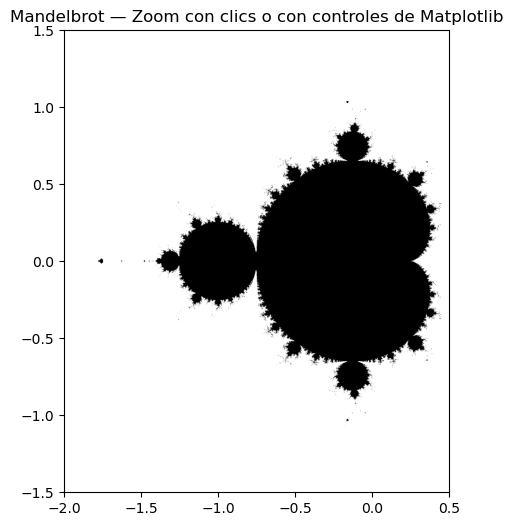

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector

# ================================
# Inicialización
# ================================
fig, ax = plt.subplots(figsize=(6, 6))
init_bounds = [-2.0, 0.5, -1.5, 1.5]

# ================================
# Funciones Mandelbrot
# ================================
def complex_matrix(x_min, x_max, y_min, y_max, pixel_density):
    re = np.linspace(x_min, x_max, int((x_max - x_min)*pixel_density))
    im = np.linspace(y_min, y_max, int((y_max - y_min)*pixel_density))
    return re[np.newaxis, :] + im[:, np.newaxis] * 1j

def iterate(c, num_iter):
    z = 0
    for _ in range(num_iter):
        z = z*z + c
    return abs(z) <= 2

def dibujar_mandelbrot(bounds, pixel_density=500, num_iter=50):
    x_min, x_max, y_min, y_max = bounds
    c = complex_matrix(x_min, x_max, y_min, y_max, pixel_density)
    img = iterate(c, num_iter)

    ax.clear()
    ax.imshow(img, cmap="binary", extent=bounds, origin="lower")
    ax.set_aspect("equal")
    ax.set_title("Mandelbrot — Zoom con clics o con controles de Matplotlib")
    plt.draw()

dibujar_mandelbrot(init_bounds)

clicks = []

# ================================
# Evento de clic para zoom por selección
# ================================
def onclick(event):
    global clicks, bounds

    if event.inaxes != ax:
        return

    clicks.append((event.xdata, event.ydata))

    # Cuando haya dos clics, definir rectángulo
    if len(clicks) == 2:
        (x1, y1), (x2, y2) = clicks

        # Normalizar valores
        x_min, x_max = sorted([x1, x2])
        y_min, y_max = sorted([y1, y2])

        bounds = [x_min, x_max, y_min, y_max]

        dibujar_mandelbrot(ax, bounds)

        clicks = []

# fig.canvas.mpl_connect("button_press_event", onclick)
def on_draw(event):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    print(f"Nuevos límites: xlim={xlim}, ylim={ylim}")
    dibujar_mandelbrot(xlim + ylim)

# Conectar el evento draw_event
# fig.canvas.mpl_connect('draw_event', on_draw)

def onselect(eclick, erelease):
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    if None in (x1,y1,x2,y2):
        return
    x_min, x_max = sorted([x1, x2])
    y_min, y_max = sorted([y1, y2])
    bounds = [x_min, x_max, y_min, y_max]
    dibujar_mandelbrot(bounds, pixel_density=500, num_iter=50)
    fig.canvas.draw_idle()

def on_key(event):
    if event.key == 'r':
        bounds = [-2.0, 0.5, -1.5, 1.5]
        dibujar_mandelbrot(bounds, pixel_density=500, num_iter=50)
        fig.canvas.draw_idle() 

rect_selector = RectangleSelector(
    ax, onselect,
    useblit=False,
    button = [1],
    minspanx=5,
    minspany=5,
    spancoords = 'pixels',
    interactive=True
)

fig.canvas.mpl_connect('key_press_event', on_key)

plt.show()
